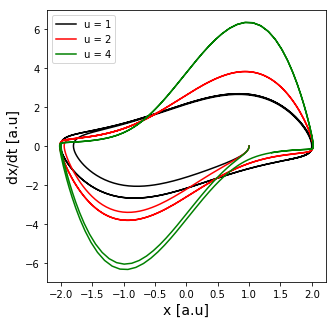

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def F(p):
    w  = 1
    x  = p[0]
    dx = p[1]
    F1 = dx
    F2 = u*(1-x**2)*dx - x*w**2
    return np.array([F1,F2], float)

def EDO_solve(F,T,p):
    x  = []
    dx = []

    for t in T:
        x.append(p[0])
        dx.append(p[1])

        k1 = h*F(p)
        k2 = h*F(p + k1/2)
        k3 = h*F(p + k2/2)
        k4 = h*F(p + k3)
        p += (k1 + 2*k2 + 2*k3 + k4)/6
    
    return np.array([x,dx], float)

p0 = [1,0]

a = 0
b = 20    
N = 1000
h = (b-a)/N
T = np.arange(a,b,h)

u = 1
c = ['-k', '-r', '-g']
n = ['u = 1', 'u = 2', 'u = 4']
plt.figure(figsize = (5,5))
for i in range(3):
    plt.plot(EDO_solve(F,T,p0)[0], EDO_solve(F,T,p0)[1], c[i], label = n[i])
    u *= 2

plt.legend(loc = 'best')
plt.xlabel('x [a.u]', size = 14)
plt.ylabel('dx/dt [a.u]', size = 14)
plt.savefig('im_8_6c')
plt.show()